In [32]:
"""
Opis problemu:
---------------
Ten skrypt analizuje zbiór danych dotyczący jakości białego wina. 
Celem jest przewidywanie jakości wina na podstawie jego cech chemicznych i sensorycznych, 
wykorzystując dwa klasyfikatory: drzewo decyzyjne i SVM (Support Vector Machine).

Autor: Karol Szmajda

Instrukcja użycia:
------------------
1. Upewnij się, że plik `winequality-white.csv` znajduje się w katalogu roboczym.
2. Plik powinien zawierać dane z kolumnami oddzielonymi średnikiem (;).
3. Uruchom skrypt w środowisku Python z wymaganymi bibliotekami (pandas, sklearn, seaborn, matplotlib).
4. Wyniki klasyfikacji, macierze pomyłek oraz inne wizualizacje zostaną wyświetlone w terminalu i na wykresach.
"""

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie zbioru danych
# Plik `winequality-white.csv` zawiera dane dotyczące jakości białego wina.
# Kolumny reprezentują cechy chemiczne (np. kwasowość, pH) i sensoryczne wina.
data = pd.read_csv('winequality-white.csv', sep=';')

# Przygotowanie macierzy cech (X) i zmiennej celu (y)
# X: wszystkie kolumny poza 'quality' (cechy wejściowe)
# y: kolumna 'quality' (etykiety jakości wina)
X = data.drop('quality', axis=1).values
y = data['quality'].values

# Zakodowanie zmiennej celu jako liczb całkowitych
# Proces kodowania zamienia etykiety jakości na liczby całkowite (np. 3 -> 0, 4 -> 1).
le = LabelEncoder()
y = le.fit_transform(y)

# Podział danych na zbiór treningowy i testowy
# Zbiór treningowy: 80% danych, używany do trenowania modeli
# Zbiór testowy: 20% danych, używany do oceny modeli
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych
# Skalowanie danych wejściowych w taki sposób, aby miały średnią 0 i odchylenie standardowe 1.
# Standaryzacja poprawia skuteczność algorytmów uczących się.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Dopasowanie skalera do danych treningowych i skalowanie
X_test = scaler.transform(X_test)       # Skalowanie danych testowych na podstawie dopasowanego skalera


Metryki klasyfikacji dla Drzewa Decyzyjnego i SVM:
Metryka        Drzewo Decyzyjne    SVM                 
Dokładność     0.61                0.56                
Precyzja       0.62                0.55                
Czułość        0.61                0.56                
F1-score       0.61                0.53                


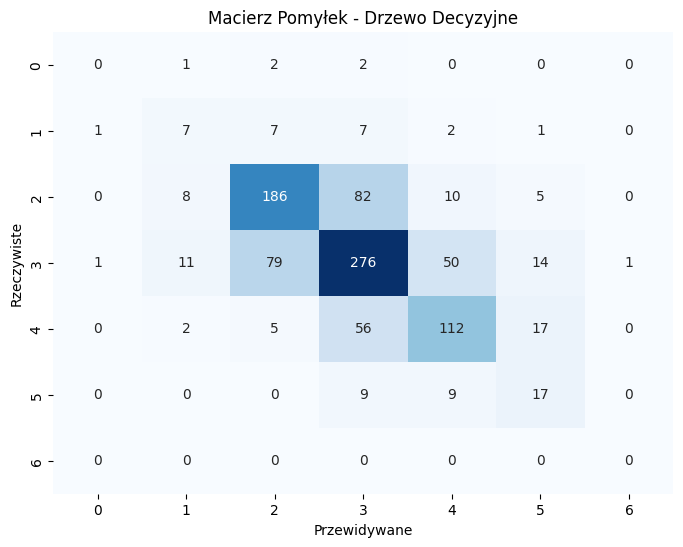

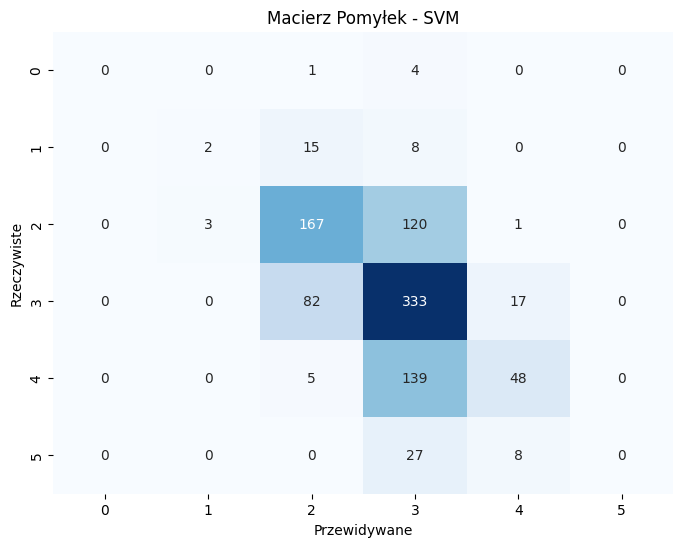

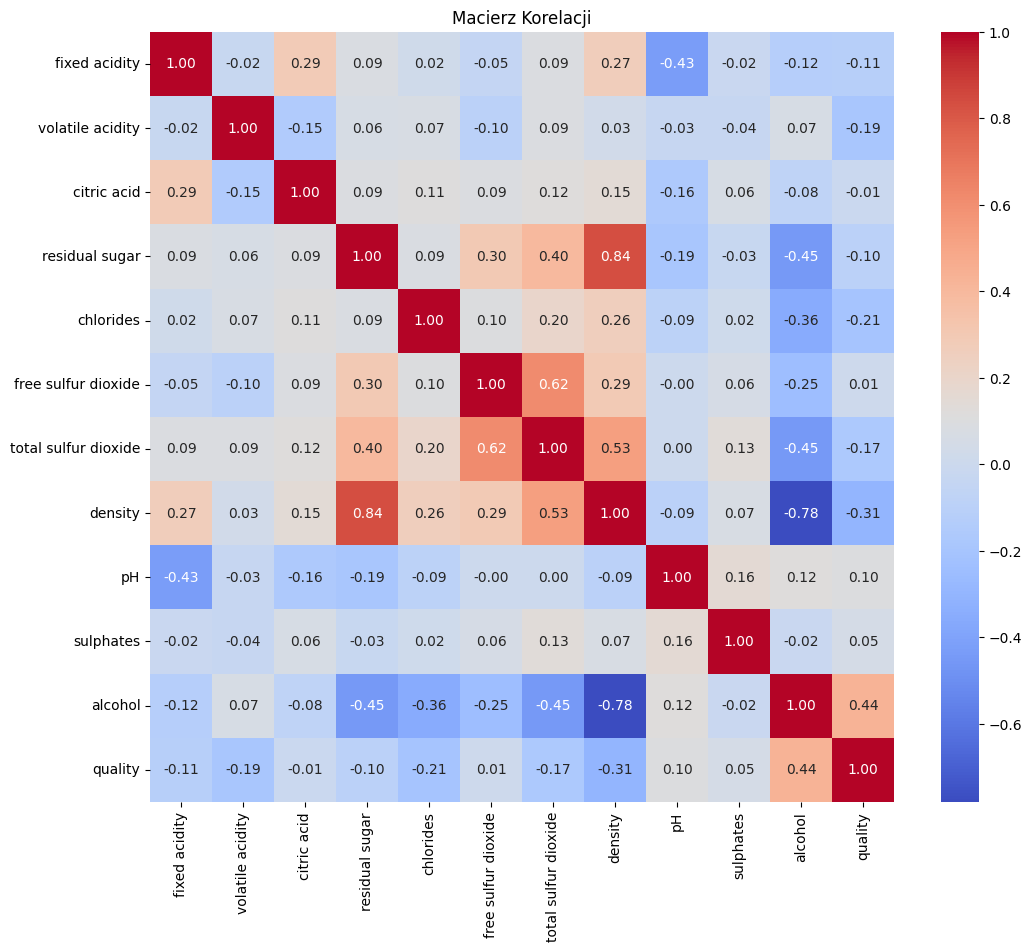

In [35]:
# Klasyfikator Drzewa Decyzyjnego
# ---------------------------------
# Trenowanie drzewa decyzyjnego na danych treningowych
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Przewidywanie etykiet dla zbioru testowego
dt_predictions = dt_classifier.predict(X_test)

# Obliczanie metryk dla drzewa decyzyjnego
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted', zero_division=0)
dt_recall = recall_score(y_test, dt_predictions, average='weighted', zero_division=0)
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

# Klasyfikator SVM
# -----------------
# Trenowanie modelu SVM na danych treningowych
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Przewidywanie etykiet dla zbioru testowego
svm_predictions = svm_classifier.predict(X_test)

# Obliczanie metryk dla SVM
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, svm_predictions, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

# Wyświetlenie metryk w formacie tabelarycznym
# ---------------------------------------------
print("\nMetryki klasyfikacji dla Drzewa Decyzyjnego i SVM:")
print(f"{'Metryka':<15}{'Drzewo Decyzyjne':<20}{'SVM':<20}")
print(f"{'Dokładność':<15}{dt_accuracy:<20.2f}{svm_accuracy:<20.2f}")
print(f"{'Precyzja':<15}{dt_precision:<20.2f}{svm_precision:<20.2f}")
print(f"{'Czułość':<15}{dt_recall:<20.2f}{svm_recall:<20.2f}")
print(f"{'F1-score':<15}{dt_f1:<20.2f}{svm_f1:<20.2f}")

# Wizualizacja macierzy pomyłek
# ------------------------------
# Drzewo Decyzyjne
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz Pomyłek - Drzewo Decyzyjne')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

# SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz Pomyłek - SVM')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

# Macierz korelacji
# ------------------
# Wizualizacja korelacji między cechami w danych
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz Korelacji')
plt.show()

In [36]:
# Tabela z danymi wejściowymi
# Każdy wiersz reprezentuje zestaw cech chemicznych wina (np. kwasowość, pH, zawartość alkoholu).
manual_inputs = np.array([
    [7.0, 0.27, 0.36, 20.7, 0.045, 45, 170, 1.001, 3.0, 0.45, 8.8],  # Przykład 1
    [6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5],    # Przykład 2
    [8.1, 0.28, 0.4, 6.9, 0.05, 30, 97, 0.9951, 3.26, 0.44, 10.1]    # Przykład 3
])

# Skalowanie danych wejściowych
# Standaryzacja danych wejściowych przy użyciu wcześniej wytrenowanego skalera.
manual_inputs_scaled = scaler.transform(manual_inputs)

# Przewidywanie za pomocą wytrenowanych klasyfikatorów
# Drzewo Decyzyjne i SVM przewidują etykiety na podstawie skalowanych danych.
manual_dt_predictions = dt_classifier.predict(manual_inputs_scaled)
manual_svm_predictions = svm_classifier.predict(manual_inputs_scaled)

np.set_printoptions(suppress=True, precision=3)

# Wyświetlanie wyników
# Dla każdego wiersza danych wejściowych wyświetlane są:
# - Oryginalne dane wejściowe
# - Przewidywania Drzewa Decyzyjnego
# - Przewidywania SVM
print("\nPrzewidywania dla ręcznie wprowadzonych danych wejściowych:")
for i, input_data in enumerate(manual_inputs):
    print(f"Przykład {i+1}:")
    print(f"Wejście (oryginalne): {input_data}")
    print(f"Przewidywanie Drzewa Decyzyjnego: {le.inverse_transform([manual_dt_predictions[i]])[0]}")
    print(f"Przewidywanie SVM: {le.inverse_transform([manual_svm_predictions[i]])[0]}")
    print()


Przewidywania dla ręcznie wprowadzonych danych wejściowych:
Przykład 1:
Wejście (oryginalne): [  7.      0.27    0.36   20.7     0.045  45.    170.      1.001   3.
   0.45    8.8  ]
Przewidywanie Drzewa Decyzyjnego: 6
Przewidywanie SVM: 5

Przykład 2:
Wejście (oryginalne): [  6.3     0.3     0.34    1.6     0.049  14.    132.      0.994   3.3
   0.49    9.5  ]
Przewidywanie Drzewa Decyzyjnego: 6
Przewidywanie SVM: 5

Przykład 3:
Wejście (oryginalne): [ 8.1    0.28   0.4    6.9    0.05  30.    97.     0.995  3.26   0.44
 10.1  ]
Przewidywanie Drzewa Decyzyjnego: 6
Przewidywanie SVM: 6

